http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUPDMLcgvKol3SSxJVNC1UwgoSi0oyk9OLS7OzEsHCbhllsT75qek5oA4wcn5RanWXApctQA4OBaa

In [ ]:
# get a proper neural net trained (don’t need to add convolutions/hidden layers)
#make sure you have your feature data and your target data set up  
#and make sure you are using the right loss function  
#then you can start adding layers, tuning, feature engineering ect

In [1]:
import pandas as pd
import numpy as np                     # numeric python lib
#import matplotlib.image as mpimg       # reading images to numpy arrays

from pylab import rcParams
rcParams['figure.figsize'] = (6, 6)      # setting default size of plots
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
#from sklearn.cross_validation import StratifiedShuffleSplit   # this was the old version
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
def warn(*args, **kwargs): pass
import warnings
warnings.warn = warn

In [3]:
train_df = pd.read_csv("./data/train.csv")

In [4]:
train_df.head(10)

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.00000,0.000000,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.00000,0.000000,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.00000,0.000000,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.00000,0.000000,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.031250
5,8,Magnolia_Salicifolia,0.070312,0.093750,0.033203,0.001953,0.000000,0.152340,0.007812,0.0,...,0.145510,0.000000,0.041992,0.000000,0.005859,0.00000,0.000000,0.000000,0.001953,0.013672
6,10,Quercus_Canariensis,0.021484,0.031250,0.017578,0.009766,0.001953,0.042969,0.039062,0.0,...,0.085938,0.000000,0.040039,0.000000,0.009766,0.00000,0.000000,0.000000,0.039062,0.003906
7,11,Quercus_Rubra,0.000000,0.000000,0.037109,0.050781,0.003906,0.000000,0.003906,0.0,...,0.038086,0.025391,0.009766,0.002930,0.021484,0.00000,0.037109,0.006836,0.002930,0.036133
8,14,Quercus_Brantii,0.005859,0.001953,0.033203,0.015625,0.001953,0.000000,0.023438,0.0,...,0.000000,0.000000,0.008789,0.000000,0.017578,0.00000,0.000000,0.000977,0.033203,0.074219
9,15,Salix_Fragilis,0.000000,0.000000,0.009766,0.037109,0.072266,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.070312,0.013672,0.19238,0.000000,0.074219,0.000000,0.000000


In [5]:
train_df["species"].value_counts()[:20]

Quercus_Infectoria_sub    10
Alnus_Sieboldiana         10
Acer_Palmatum             10
Quercus_Vulcanica         10
Callicarpa_Bodinieri      10
Eucalyptus_Glaucescens    10
Quercus_Cerris            10
Acer_Pictum               10
Ilex_Cornuta              10
Morus_Nigra               10
Cornus_Controversa        10
Eucalyptus_Urnigera       10
Cornus_Macrophylla        10
Quercus_Pyrenaica         10
Betula_Pendula            10
Alnus_Maximowiczii        10
Cercis_Siliquastrum       10
Quercus_Phillyraeoides    10
Quercus_Rubra             10
Acer_Rubrum               10
Name: species, dtype: int64

In [6]:
train_df.shape

(990, 194)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 194 entries, id to texture64
dtypes: float64(192), int64(1), object(1)
memory usage: 1.5+ MB


In [8]:
test_df = pd.read_csv("./data/test.csv")

In [9]:
test_df.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [10]:
# not the species!!
test_df.shape

(594, 193)

In [11]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 193 entries, id to texture64
dtypes: float64(192), int64(1)
memory usage: 895.7 KB


* checking fro NaN values.

In [12]:
train_df.isnull().sum().sum()

0

In [13]:
test_df.isnull().sum().sum()

0

## EDA-distribution

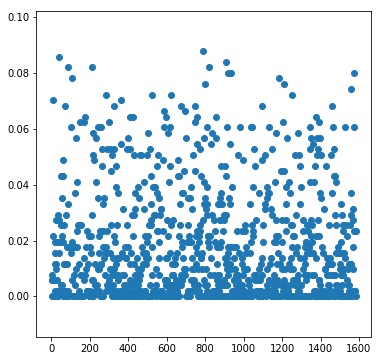

In [31]:
_ = plt.scatter(train_df["id"], train_df["margin1"])

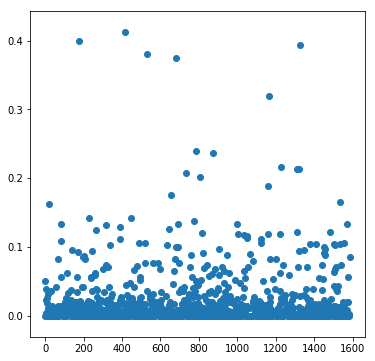

In [32]:
_ = plt.scatter(train_df["id"], train_df["texture1"])

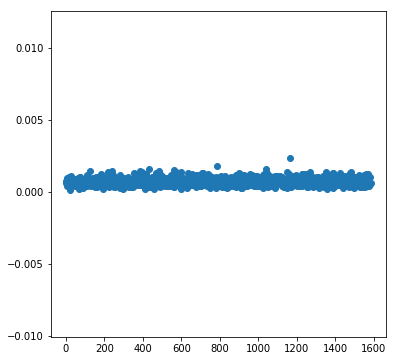

In [30]:
_ = plt.scatter(train_df["id"], train_df["shape1"])

* Distribution of the raw data

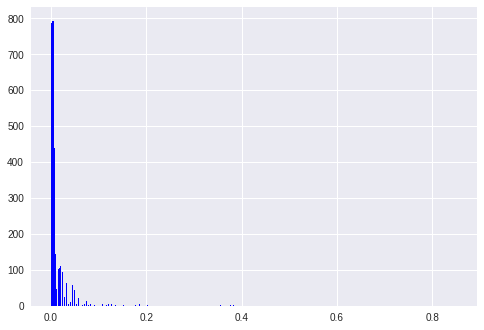

In [64]:
_ = plt.hist(X_train,bins= 100,facecolor='blue')

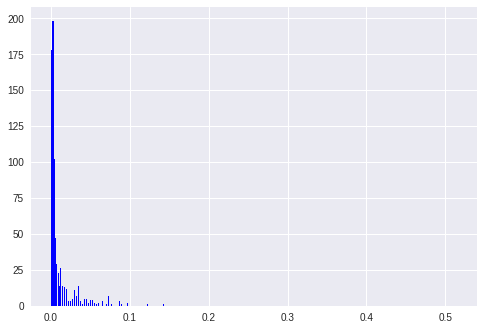

In [65]:
_ = plt.hist(X_test, bins = 100, facecolor= "blue")

* distribution after scaling and deskewing(using np.sqrt) out side of the pipeline, just for EDA 

In [71]:
# we had 0 in the data so we couldn't use np.log
#we used np.sqrt to take care of skewness but we need np.log to use it later in the pipeline.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(np.sqrt(X_train))
scaled_test_data = scaler.transform(np.sqrt(X_test))

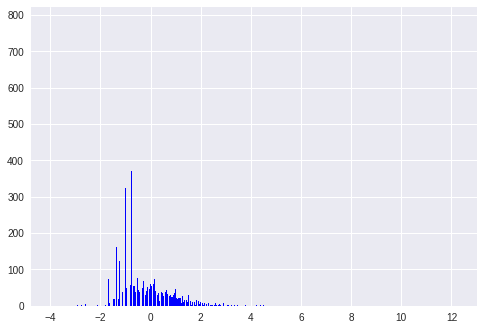

In [63]:
_ = plt.hist(scaled_data,bins= 100,facecolor='blue')

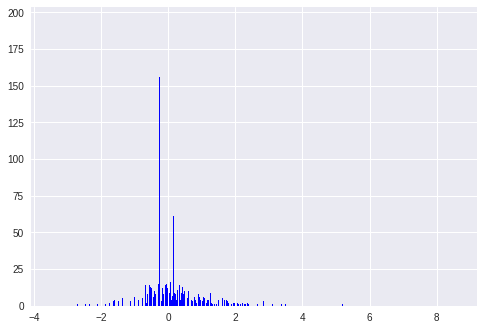

In [72]:
_ = plt.hist(scaled_test_data, bins=100, facecolor="blue")

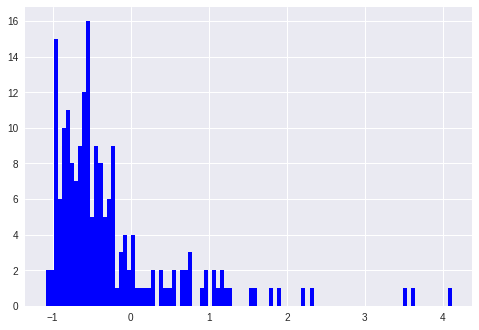

In [57]:
_ = plt.hist(scaled_data[0],bins= 100,facecolor='blue')

## Data Prepration

In [14]:
# function to organize the data
def encode(train_df, test_df):
    le = LabelEncoder().fit(train_df.species)
    labels = le.transform(train_df.species)   #encode species strings
    classes = list(le.classes_)
    test_ids = test_df.id
    
    
    train_df = train_df.drop(["species" , "id"] , axis = 1)
    test_df =test_df.drop(["id"], axis =1)
    
    return train_df, labels, test_df, test_ids, classes

In [15]:
train_df, labels, test_df, test_ids, classes = encode(train_df, test_df)
train_df.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [19]:
#becareful with the 0 in deskewing(add some number like alpha = 1 to the data)
train_df["margin8"].value_counts()

0.000000    805
0.005859     91
0.003906     50
0.007812     20
0.001953     16
0.013672      2
0.017578      2
0.015625      2
0.031250      2
Name: margin8, dtype: int64

* Stratified Train/Test Split 
* Strafication is necessary for this dataset becaue we have 99 classes for 990 samples.
* This will ensure we have all classes represented in both the train and test indices.
* This allows you to create many splits for cross validation without allocating all them to memory at the same time.

### splitting the data

In [16]:
#new version of sss
X = train_df.values
y = labels

In [17]:
X.shape

(990, 192)

In [18]:
y.shape

(990,)

In [19]:
# new sss
sss = StratifiedShuffleSplit(test_size = 0.2, random_state= 8)
sss.get_n_splits(X, y)

10

In [20]:
#to use the new version of sss

for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]

In [21]:
X_train.shape

(792, 192)

In [22]:
y_train.shape

(792,)

## accuracy and log_loss with raw data 

In [65]:
classifiers_exp = [
    KNeighborsClassifier(3,n_jobs= -1),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression()]

log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers_exp:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    

    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 91.4141%
Log Loss: 1.23191631854
RandomForestClassifier
****Results****
Accuracy: 87.3737%
Log Loss: 1.64850465476
GaussianNB
****Results****
Accuracy: 63.6364%
Log Loss: 12.5595550764
LogisticRegression
****Results****
Accuracy: 64.6465%
Log Loss: 4.19085790305


## Deskewing 

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin
class Deskew(BaseEstimator, TransformerMixin):
    def __init__ (self,alpha=1):
        self.alpha = alpha
    def _reset(self):
        pass
    def fit(self,X,y):
        return self
    def transform(self,X):
        return np.log(X + self.alpha)
    def fit_transform(self,X,y):
        return self.transform(X)
    def inverse_transform(self, X):
        return np.exp(X) - self.alpha
    def score(self,X,y):
        pass
        

In [38]:
deskew = Deskew()

## LogosticRegression :

*  Deskewed & Scaled  Data

In [43]:
logreg_pipe = Pipeline([
    ("deskew", Deskew()),
    ("scaler" , StandardScaler()),
    ("logit", LogisticRegression(random_state=8,n_jobs= -1))
])

### Pipeline only

In [213]:
logreg_pipe.fit(X_train,y_train)

Pipeline(steps=[('deskew', Deskew(alpha=1)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [214]:
logreg_pipe.score(X_train,y_train)

1.0

In [215]:
train_predictions = logreg_pipe.predict(X_test)
accuracy_logreg = accuracy_score(y_test, train_predictions)
accuracy_logreg

0.96969696969696972

In [216]:
train_predictions_logreg = logreg_pipe.predict_proba(X_test)
log_loss_logreg = log_loss(y_test, train_predictions_logreg)
log_loss_logreg

0.87051247137986121

In [201]:
logreg_params = {
    "logit__max_iter" : [50,200],
    "logit__C" : np.logspace(-4,4,9)
}

In [203]:
#GridSearch 
gs_logreg = GridSearchCV(logreg_pipe, param_grid=logreg_params,cv = 5, n_jobs= -1)

## Logreg aftre GridSearch

In [204]:
#LogistticRegression GridSearch
gs_logreg.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('deskew', Deskew(alpha=1)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=8, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'logit__max_iter': [50, 200], 'logit__C': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00,   1.00000e+01,   1.00000e+02,   1.00000e+03,
         1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [218]:
#LogistticRegression GridSearch
gs_train_pred1 = gs_logreg.predict(X_test)
accuracy_logreg_gs1 = accuracy_score(y_test, gs_train_pred1)
accuracy_logreg_gs1

0.95959595959595956

In [217]:
#LogisticRegression GridSearch Log_Loss
gs_train_pred_logreg = gs_logreg.predict_proba(X_test)
log_loss_logreg_gs = log_loss(y_test, gs_train_pred_logreg)
log_loss_logreg_gs

2.2502508969255581

## RandomForestClassifier :

In [39]:
rfc_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler',StandardScaler()),
    ('clf', RandomForestClassifier(random_state=8))
])

### Pipeline only

In [40]:
rfc_pipe.fit_transform(X_train, y_train)

array([[-0.64047165,  0.7325464 ,  1.91418801, ..., -0.23663619,
        -0.65661726, -0.34424855],
       [ 1.92721422, -0.32356408, -0.55956228, ...,  2.94416485,
        -0.44026951,  0.42730646],
       [ 1.33240686, -0.6305242 , -0.63267724, ...,  0.0187666 ,
         0.63192995, -0.17164948],
       ..., 
       [ 0.31159892, -0.93985483, -0.1237891 , ...,  1.11681459,
         0.06204504, -0.38752459],
       [ 1.18167831, -0.32356408, -0.63267724, ..., -0.23663619,
         0.77371758, -0.47415791],
       [ 1.38246774, -0.24719997, -0.85287691, ...,  0.61175885,
        -0.44026951,  2.25922632]])

In [41]:
rfc_pipe.score(X_train,y_train)

1.0

In [42]:
rfc_predictions = rfc_pipe.predict(X_test)
accuracy_rfc = accuracy_score(y_test, rfc_predictions)
accuracy_rfc

0.88383838383838387

In [43]:
rfc_predict_proba = rfc_pipe.predict_proba(X_test)
rfc_log_loss = log_loss(y_test, rfc_predict_proba)
rfc_log_loss

1.3153664889996926

In [44]:
rfc_params = {
    'clf__n_estimators':[10,50,100,200],
    'clf__max_features':['auto','log2']
}

## RandomForest after GridSearch

In [45]:
#you might want to fit on this
rfc_gs = GridSearchCV(rfc_pipe, param_grid=rfc_params, cv=5,n_jobs=-1)
rfc_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('deskew', Deskew(alpha=1)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impur...stimators=10, n_jobs=1, oob_score=False, random_state=8,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'clf__max_features': ['auto', 'log2'], 'clf__n_estimators': [10, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
rfc_gs.score(X_test,y_test)

0.95959595959595956

In [47]:
rfc_pred_gs = rfc_gs.predict(X_test)
accuracy_rfc_gs = accuracy_score(y_test, rfc_pred_gs)
accuracy_rfc_gs

0.95959595959595956

In [48]:
rfc_predict_proba = rfc_gs.predict_proba(X_test)
rfc_log_loss = log_loss(y_test, rfc_predict_proba)
rfc_log_loss

0.7796124150673388

## naive_bayes Gaussian : 

In [105]:
gnb_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler',StandardScaler()),
    ('gnb', GaussianNB())
])

## Pipeline only

In [106]:
gnb_pipe.fit(X_train,y_train)

Pipeline(steps=[('deskew', <__main__.Deskew instance at 0x7f1bff041ab8>), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gnb', GaussianNB(priors=None))])

In [107]:
gnb_pipe.score(X_train,y_train)

1.0

In [108]:
gnb_predictions = gnb_pipe.predict(X_test)
accuracy_gnb = accuracy_score(y_test, gnb_predictions)
accuracy_gnb

0.63636363636363635

In [109]:
gnb_predict_proba = gnb_pipe.predict_proba(X_test)
gnb_log_loss = log_loss(y_test, gnb_predict_proba)
gnb_log_loss

12.559571498647189

 ## KNeighborsClassifier :

In [53]:
knc_pipe = Pipeline([
    ("deskew", Deskew()),
    ('scaler', StandardScaler()),
    ('knc',KNeighborsClassifier())
])

## Pipeline only

In [111]:
knc_pipe.fit(X_train,y_train)

Pipeline(steps=[('deskew', <__main__.Deskew instance at 0x7f1bff095e60>), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knc', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))])

In [112]:
knc_pipe.score(X_train,y_train)

0.98484848484848486

In [113]:
knc_predictions= knc_pipe.predict(X_test)
accuracy_knc = accuracy_score(y_test, knc_predictions)
accuracy_knc

0.95959595959595956

In [114]:
knc_predict_proba = knc_pipe.predict_proba(X_test)
knc_log_loss = log_loss(y_test,knc_predict_proba)
knc_log_loss

0.4593904728158727

In [54]:
#for GridSearch
knparams = {
    'knc__n_neighbors':range(1,15),
    "knc__weights" : ["distance","uniform"]
}

## KNeighbors after GridSearch

In [55]:
kn_gs = GridSearchCV(knc_pipe, param_grid=knparams, cv=5,n_jobs=-1)
kn_gs.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('deskew', Deskew(alpha=1)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knc', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'knc__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'knc__weights': ['distance', 'uniform']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
kn_gs.score(X_test, y_test)

0.96464646464646464

In [61]:
kn_gs_predictions= kn_gs.predict(X_test)
accuracy_kn_gs = accuracy_score(y_test, kn_gs_predictions)
accuracy_kn_gs

0.96464646464646464

In [62]:
kngs_predict_proba = kn_gs.predict_proba(X_test)
kngs_log_loss = log_loss(y_test,kngs_predict_proba)
kngs_log_loss

1.2210678523454264

## creating the Results  DataFrame 

In [25]:
pre_list =["raw data","raw data","raw data","raw data",
           "scaled","scaled","scaled","scaled",
           "deskewed_scaled","deskewed_scaled","deskewed_scaled","deskewed_scaled",
           "gridsearched","gridsearched","gridsearched"]

clf_list = ["KNeighbors","RandomForest","GaussianNB","LogisticReg",
           "KNeighbors","RandomForest","GaussianNB","LogisticReg",
           "KNeighbors","RandomForest","GaussianNB","LogisticReg",
           "KNeighbors","RandomForest","LogisticReg"]

acc_list = [0.914141, 0.873737, 0.636364, 0.646465,
           0.9595959, 0.8737373,0.636364,0.9696969,
           0.9595959,0.8838383,0.6363636,0.9696969,
           0.964646464,0.9595959, 0.9595959]

loss_list = [1.231916318541, 1.64850465476,12.5595550764,4.19085790305,
            0.46514519141783406,1.326179028511828,12.559555691063171,0.87402306440342914,
            0.4593904728158727,1.3153664889996926,12.559571498647189,0.87051247137986121,
            1.2210678523454264,0.7796124150673388,2.2502508969255581] 

In [26]:
log_df = pd.DataFrame(
    {'Preprocessing': pre_list,
     "Classifier": clf_list,
     'Accuracy': acc_list,
     "Log Loss" : loss_list
    },columns=['Preprocessing','Classifier', 'Accuracy',"Log Loss"])

In [27]:
log_df

,Preprocessing,Classifier,Accuracy,Log Loss
0,raw data,KNeighbors,0.914141,1.231916
1,raw data,RandomForest,0.873737,1.648505
2,raw data,GaussianNB,0.636364,12.559555
3,raw data,LogisticReg,0.646465,4.190858
4,scaled,KNeighbors,0.959596,0.465145
5,scaled,RandomForest,0.873737,1.326179
6,scaled,GaussianNB,0.636364,12.559556
7,scaled,LogisticReg,0.969697,0.874023
8,deskewed_scaled,KNeighbors,0.959596,0.459390
9,deskewed_scaled,RandomForest,0.883838,1.315366


In [32]:
log_scaled = log_df[log_df["Preprocessing"]== "gridsearched"]

In [33]:
log_scaled

,Preprocessing,Classifier,Accuracy,Log Loss
12,gridsearched,KNeighbors,0.964646,1.221068
13,gridsearched,RandomForest,0.959596,0.779612
14,gridsearched,LogisticReg,0.959596,2.250251



* PreProcessing on the raw data:



|PreProcessing| Accuracy |   Log_Loss   |
|:-----------:|:--------:|:-----------: |
| KNeighbors  | 91.4141% |1.231916318541|
| RandomForest| 87.3737% |1.64850465476 |
| GaussianNB  | 63.6364% |12.5595550764 |
| LogisticReg | 64.6465% |4.19085790305 |



* PreProcessing Scaled data:

|PreProcessing| Accuracy |       Log_Loss     |
|:-----------:|:--------:|:------------------:|
| KNeighbors  | 95.95959%| 0.46514519141783406|
| RandomForest| 87.37373%| 1.326179028511828  |
| GaussianNB  | 63.6364% | 12.559555691063171 |
| LogisticReg | 96.96969%| 0.87402306440342914|

* PreProcessing Skewed &Scaled data:


|PreProcessing| Accuracy |       Log_Loss     |
|:-----------:|:--------:|:------------------:|
| KNeighbors  | 95.95959%| 0.4593904728158727 |
| RandomForest| 88.38383%| 1.3153664889996926 |
| GaussianNB  | 63.63636%| 12.559571498647189 |
| LogisticReg | 96.96969%| 0.87051247137986121|

* After GridSearch


|PreProcessing| Accuracy |       Log_Loss     |
|:-----------:|:--------:|:------------------:|
| KNeighbors  | 96.46464%| 1.2210678523454264 |
| RandomForest| 95.95959%| 0.7796124150673388 |
| LogisticReg | 95.95959%| 2.2502508969255581 |

 ## Raw  Plots :

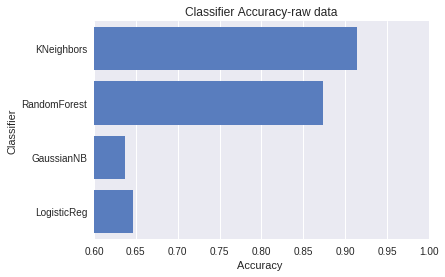

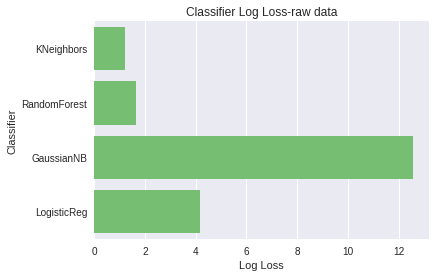

In [47]:
data_raw = log_df[log_df["Preprocessing"]== "raw data"]

sns.set_color_codes("muted")

sns.barplot(x='Accuracy', y='Classifier', data=data_raw, color="b")

plt.xlabel('Accuracy ')
plt.title('Classifier Accuracy-raw data')
plt.xlim(0.6,1)
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=data_raw, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss-raw data')
plt.show()

## Scaled  Plots

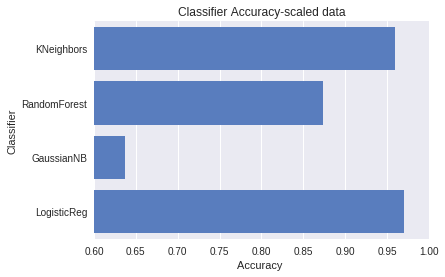

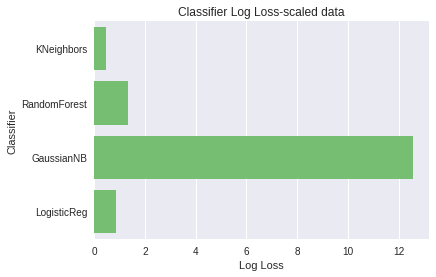

In [46]:
data_scaled = log_df[log_df["Preprocessing"]== "scaled"]

sns.set_color_codes("muted")

sns.barplot(x='Accuracy', y='Classifier', data=data_scaled, color="b")

plt.xlabel('Accuracy ')
plt.title('Classifier Accuracy-scaled data')
plt.xlim(0.6,1)
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=data_scaled, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss-scaled data')
plt.show()

## deskewed & Scaled  Plots :

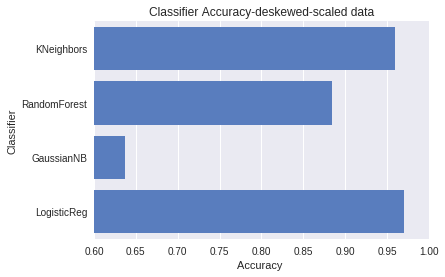

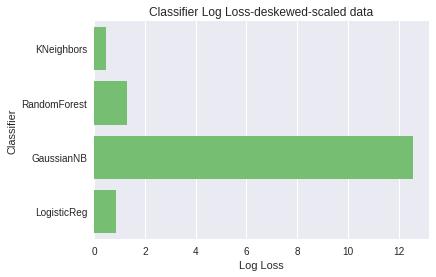

In [45]:
data_skewed_scaled = log_df[log_df["Preprocessing"]== "deskewed_scaled"]

sns.set_color_codes("muted")

sns.barplot(x='Accuracy', y='Classifier', data=data_skewed_scaled, color="b")

plt.xlabel('Accuracy ')
plt.title('Classifier Accuracy-deskewed-scaled data')
plt.xlim(0.6,1)
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=data_skewed_scaled, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss-deskewed-scaled data')
plt.show()

## GridSearched  Plots:

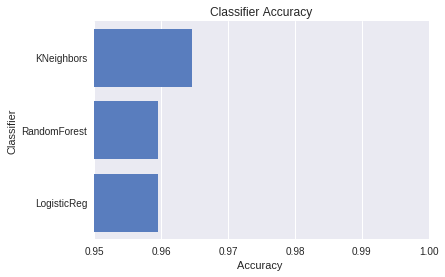

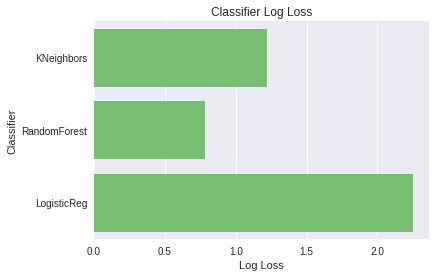

In [39]:
data_gridsearched = log_df[log_df["Preprocessing"]== "gridsearched"]

sns.set_color_codes("muted")

sns.barplot(x='Accuracy', y='Classifier', data=data_gridsearched, color="b")

plt.xlabel('Accuracy ')
plt.title('Classifier Accuracy')
plt.xlim(0.95,1)
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=data_gridsearched, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')

plt.show()

In [34]:
#get the predicted feastures and encode them then add them to the features
# remmeber to change the input dim for features.